<a href="https://colab.research.google.com/github/abdulafif999/tugas/blob/main/tugasskikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris digunakan untuk mengambil dataset Iris dari data seaborn yang telah tersedia yaitu data bunga.

In [ ]:
!pip install -Iv scikit-learn==0.15

Created temporary directory: /tmp/pip-ephem-wheel-cache-6ky4895i
Created temporary directory: /tmp/pip-req-tracker-pesuvtfl
Created requirements tracker '/tmp/pip-req-tracker-pesuvtfl'
Created temporary directory: /tmp/pip-install-ocm1a6zg
1 location(s) to search for versions of scikit-learn:
* https://pypi.org/simple/scikit-learn/
Getting page https://pypi.org/simple/scikit-learn/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/scikit-learn/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/scikit-learn/ HTTP/1.1" 200 80535
Updating cache with response from "https://pypi.org/simple/scikit-learn/"
Caching due to etag
Analyzing links from page https://pypi.org/simple/scikit-learn/
  Found link https://files.pythonhosted.org/packages/cd/17/8624d6ba8d91f77fbbf4b6e42dda77450dd647125fcdb3f894c6b9d44a36/scikit-learn-0.9.tar.gz#sha256=5e083180a0eedf8e964c013731da30291afe

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


sns.pairplot digunakan untuk memvisualisasi dataset species yang ada dengan data iris yang sudah diimport di atas

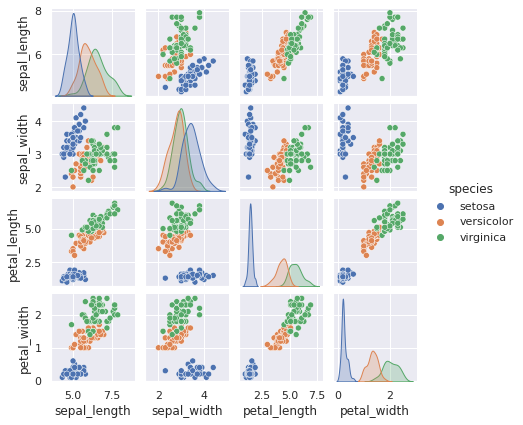

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

dalam Regresi linear terdapat langkah-langkah yang harus dilakukan yaitu 
1. memilih model kelas
2. memilih model hyperparameter
3. Mengurutkan Data kedalam fitur matrix dan target vektor
4. memuat model kedalam data
5. prediksi label untuk data yang tak diketahui

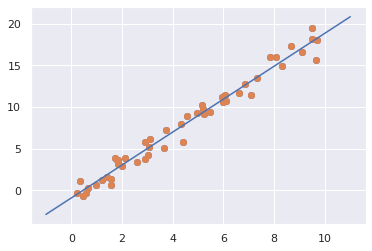

In [63]:
#@title Default title text
#mengambil data
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);
#1. Memilih model class
from sklearn.linear_model import LinearRegression
#2. Memilih Model HyperParameter
model = LinearRegression(fit_intercept=True)
model
#3. mengurutkan data kedalam fitur matrix dan target vektor
X = x[:, np.newaxis]
X.shape
#4. Memuat Model kedalam data
model.fit(X, y)
model.coef_
model.intercept_
#5. prediksi data yang masuk
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

Supervised learning example: Iris classification
Mari kita lihat contoh lain dari proses ini, menggunakan kumpulan data Iris yang telah kita diskusikan sebelumnya. Pertanyaan kita adalah ini: dengan model yang dilatih pada sebagian data Iris, seberapa baik kita dapat memprediksi label yang tersisa?
Untuk tugas ini, kita akan menggunakan model generatif yang sangat sederhana yang dikenal sebagai Gaussian naive Bayes, yang melanjutkan dengan mengasumsikan setiap kelas diambil dari sebuah sumbu-rata distribusi Gaussian. Karena sangat cepat dan tidak memiliki hyperparameter untuk dipilih, Gaussian naive Bayes sering kali merupakan model yang baik untuk digunakan sebagai klasifikasi dasar, sebelum Anda gali apakah peningkatan dapat ditemukan melalui model yang lebih canggih.
Kami ingin mengevaluasi model pada data yang belum pernah dilihat sebelumnya, jadi kami akan melakukannya membagi data menjadi satu set pelatihan dan satu set pengujian. Ini bisa dilakukan dengan tangan, tapi memang begitu lebih nyaman untuk menggunakan fungsi utilitas train_test_split:


In [66]:

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)
from sklearn.naive_bayes import GxaussianNB          # 1. choose model class
model = GaussianNB()                                # 2. instantiate model
model.fit(Xtrain, ytrain)                           # 3. fit model to data
y_model = model.predict(Xtest)                      # 4. predict on new data
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)


ImportError: ignored

Unsupervised learning example: Iris dimensionality
Sebagai contoh dari masalah Unsupervised learning, mari kita lihat pengurangan dimensi data Iris agar lebih mudah memvisualisasikannya.
Ingatlah bahwa data Iris adalah empat dimensi: ada empat fitur yang direkam untuk setiap sampel.
Tugas reduksi dimensi adalah menanyakan apakah ada dimensi yang lebih rendah yang sesuai representasi yang mempertahankan fitur penting dari data. Sering
reduksi dimensi digunakan sebagai bantuan untuk memvisualisasikan data bagaimanapun, itu jauh lebih mudah untuk memplot data dalam dua dimensi daripada dalam empat dimensi atau lebih tinggi!
Di sini kita akan menggunakan analisis komponen utama yang merupakan teknik reduksi dimensi linier cepat.
Kami akan meminta model untuk mengembalikan dua komponen — yaitu, dua dimensi
representasi data.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


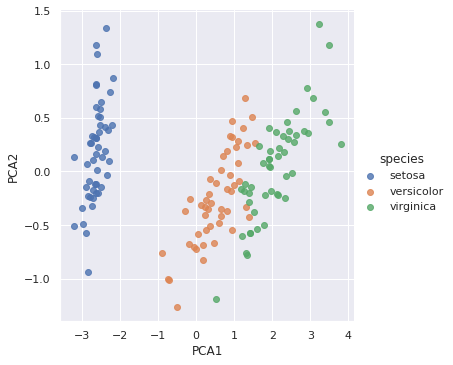

In [67]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

bisa dilihat bahwa dalam representasi dua dimensi, spesies dipisahkan dengan cukup baik,
meskipun algoritme PCA tidak memiliki pengetahuan tentang label spesies! Ini
menunjukkan kepada kita bahwa klasifikasi yang relatif mudah mungkin akan efektif
di kumpulan data, seperti yang kita lihat sebelumnya. 

Iris Clustering 
Algoritma Clustering mencoba untuk menemukan kelompok data yang berbeda tanpa mengacu pada label apa pun. Di sini kita akan menggunakan file
metode pengelompokan yang kuat yang disebut Gaussian Mixture Model (GMM),

In [ ]:
from sklearn.mixture import GMM # 1. Choose the model class
model = GMM(n_components=3,
covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
col='cluster', fit_reg=False);

ImportError: ignored

Aplikasi: Menjelajahi Digit Tulisan Tangan
Untuk mendemonstrasikan prinsip-prinsip ini pada masalah yang lebih menarik, mari kita pertimbangkan salah satu bagian dari masalah pengenalan karakter optik: identifikasi tulisan tangan. Di alam liar, masalah ini melibatkan penempatan dan pengidentifikasian karakter di sebuah gambar. Di sini kita akan mengambil jalan pintas dan menggunakan kumpulan angka yang telah diformat sebelumnya dari Scikit-Learn, yang dibangun ke dalam library.

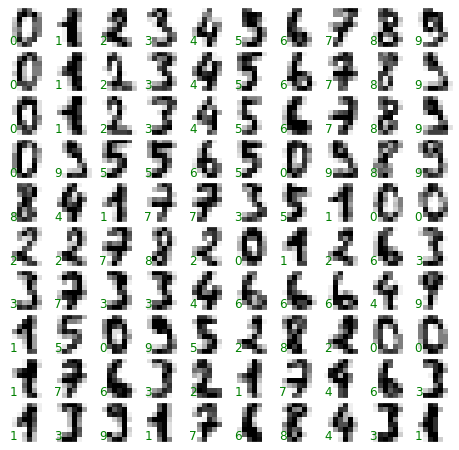

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),
  transform=ax.transAxes, color='green')

Untuk bekerja dengan data diatas dalam Scikit-Learn, kita membutuhkan representasi dua dimensi, [n_samples, n_features]. Kita dapat melakukannya dengan memperlakukan setiap piksel pada gambar sebagai fitur — yaitu, dengan meratakan array piksel sehingga kita memiliki array nilai piksel dengan panjang 64 yang mewakili setiap digit. Selain itu, kita membutuhkan
array target, yang memberikan label yang telah ditentukan sebelumnya untuk setiap digit. Kedua kuantitas ini dibangun ke dalam kumpulan data digit di bawah atribut data dan target, masing-masing:

In [ ]:
X = digits.data
X.shape

In [ ]:
y = digits.target
y.shape

Unsupervised learning: Dimensionality reduction
kita bisa memvisualisasikan titik  dalam ruang parameter 64 dimensi, tapi kenyataannya memang demikian sulit untuk secara efektif memvisualisasikan titik dalam ruang berdimensi tinggi seperti itu. Sebaliknya, kita akan mengurangi dimensi menjadi 2, menggunakan metode Unsupervised Learning. Di sini, kita akan menggunakan algoritma Manifold Learning yang disebut Isomap 

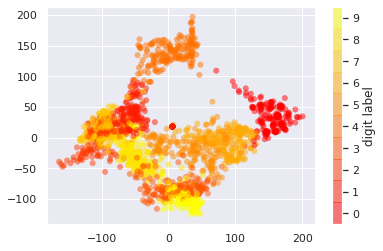

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape
#dengan kode diatas maka dimensi data menjadi 2

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('autumn', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);